# Baby Step Jump into Quantum Computing with `qiskit`
---

created by M. Y. Hanna [muha207(at)brin.go.id]()

## Before we start

In [1]:
import qiskit
version = qiskit.__version__
print("The version of Qiskit is", version)

The version of Qiskit is 0.45.1


## Create circuit

In [2]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_vector

#### Statevector and Bloch coordinates 

To obtain information about the state vector of our circuit, we can utilize the `Statevector` object, which permits us to set an initial state vector, evolve it, and view the quantum state of a single-qubit using the Bloch sphere.

In [3]:
# Display the statevector in Latex
from qiskit.visualization import array_to_latex

def statevector(qc, display_latex=True):
    '''Calculates the statevector of a quantum circuit'''
    # Set the backend to the statevector simulator
    backend = Aer.get_backend('statevector_simulator')
    # Execute the circuit and get the result
    job = execute(qc, backend)
    result = job.result()
    # Get the statevector from the result
    final_state = result.get_statevector(qc)
    if display_latex:
        # Convert the Statevector object to a numpy array and reshape it to a column vector
        column_statevector = np.reshape(final_state.data, (len(final_state.data), 1))
        # Display the statevector as a column vector in LaTeX format
        return array_to_latex(column_statevector, prefix="\\text{Statevector} = ")
    else:
        return final_state
    
def bloch_coordinates(statevector):
    '''Calculate the Bloch coordinates from a given statevector'''
    alpha, beta = statevector[0], statevector[1]
    x = 2 * np.real(np.conj(alpha) * beta)
    y = 2 * np.imag(np.conj(alpha) * beta)
    z = abs(alpha)**2 - abs(beta)**2
    return [x, y, z]

To initialize a quantum circuit, we call an object named `QuantumCircuit`.

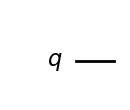

In [4]:
qc1 = QuantumCircuit(1)
qc2 = qc1.copy()
qc3 = qc1.copy()
qc4 = qc1.copy()

# see the circuit
qc1.draw('mpl', style="clifford")

In [5]:
statevector(qc1, display_latex=False)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


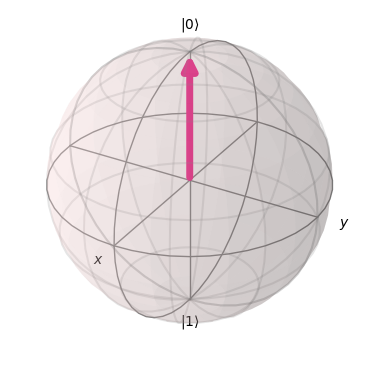

In [6]:
bloch_qc1 = bloch_coordinates(statevector(qc1, display_latex=False))
plot_bloch_vector(bloch_qc1,figsize=(3.5,3.5))

The qubit's initial state vector defaults to $|0\rangle$. If you would like to set the initial state vector to $|1\rangle$, we can do so by introducing the **X-gate** (**Pauli-X gate**) into our circuit.

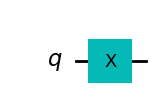

In [7]:
qc2.x(0)

qc2.draw('mpl', style="clifford")

In [8]:
statevector(qc2, display_latex=True)

<IPython.core.display.Latex object>

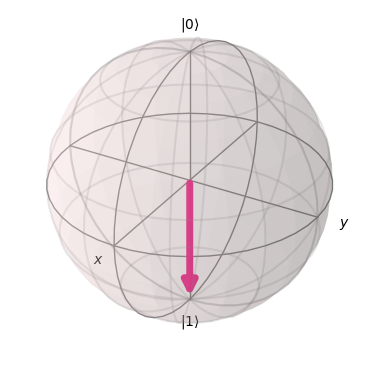

In [9]:
bloch_qc2 = bloch_coordinates(statevector(qc2, display_latex=False))
plot_bloch_vector(bloch_qc2,figsize=(3.5,3.5))

The purpose of the X-gate is to flip from $|0\rangle$ to $|1\rangle$.

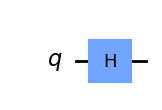

In [10]:
qc3.h(0)

qc3.draw('mpl', style="clifford")

In [11]:
statevector(qc3, display_latex=True)

<IPython.core.display.Latex object>

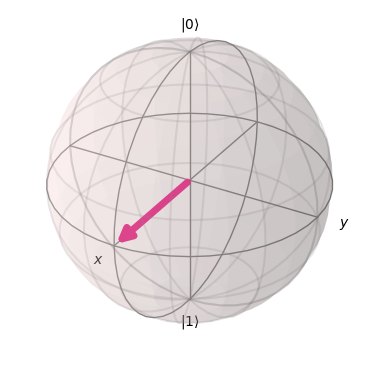

In [12]:
bloch_qc3 = bloch_coordinates(statevector(qc3, display_latex=False))
plot_bloch_vector(bloch_qc3,figsize=(3.5,3.5))

This statevector is known as $|+\rangle = H |0 \rangle$

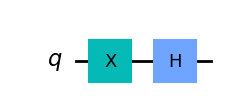

In [13]:
qc4.x(0)
qc4.h(0)

qc4.draw('mpl',style="clifford" )

In [14]:
statevector(qc4, display_latex=True)

<IPython.core.display.Latex object>

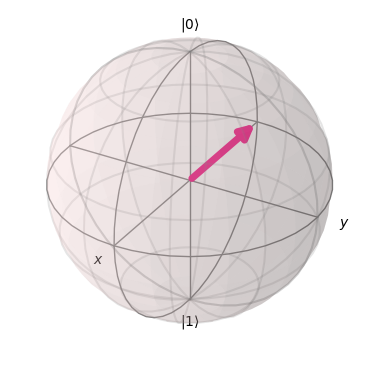

In [15]:
bloch_qc4 = bloch_coordinates(statevector(qc4, display_latex=False))
plot_bloch_vector(bloch_qc4,figsize=(3.5,3.5))

This statevector is known as $|-\rangle = H |1 \rangle$

#### Visualize the circuit

There are several option to visualize the circuit:

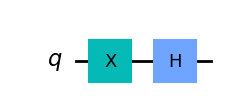

In [16]:
qc4.draw('mpl', style="clifford")

In [17]:
qc4.draw('text')

┌───┐┌───┐
q: ┤ X ├┤ H ├
   └───┘└───┘

In [18]:
qc4.draw('latex', style="clifford")

## Single qubit gates on multi-qubit statevector

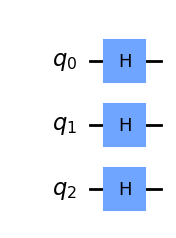

In [19]:
qc5 = QuantumCircuit(3)
# Apply Hadamard gate to each qubit
for i in range(3):
    qc5.h(i)
# See the circuit
qc5.draw('mpl', style="clifford")

In [20]:
statevector(qc5, display_latex=True)

<IPython.core.display.Latex object>

In [21]:
statevector(qc5, display_latex=False).draw('latex')

<IPython.core.display.Latex object>

Determine the operator of the our circuit

In [22]:
from qiskit.quantum_info import Operator

def Operators(qc):
    '''Determine the operator of the circuit'''
    ops = Operator(qc)
    return array_to_latex(ops.data, prefix="\\text{Circuit} = ")

In [23]:
Operators(qc5)

<IPython.core.display.Latex object>

Try another circuit

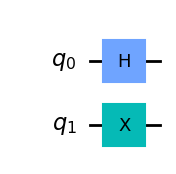

In [24]:
qc6 = QuantumCircuit(2)
qc6.h(0)
qc6.x(1)
qc6.draw('mpl', style="clifford")

In [25]:
statevector(qc6, display_latex=True)

<IPython.core.display.Latex object>

In [26]:
Operators(qc6)

<IPython.core.display.Latex object>

In [27]:
Operators(qc1)

<IPython.core.display.Latex object>

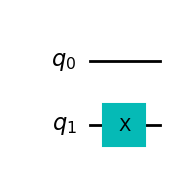

In [28]:
qc7 = QuantumCircuit(2)
qc7.x(1)

qc7.draw('mpl', style="clifford")

In [29]:
Operators(qc7)

<IPython.core.display.Latex object>

## Multi-Qubit Gates

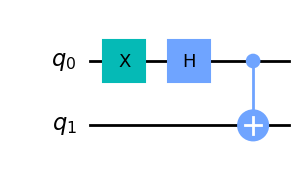

In [30]:
qc8 = QuantumCircuit(2)
qc8.x(0)
qc8.h(0)
qc8.cx(0,1)

qc8.draw('mpl', style="clifford")

In [31]:
Operators(qc8)

<IPython.core.display.Latex object>

In [32]:
statevector(qc8, display_latex=True)

<IPython.core.display.Latex object>

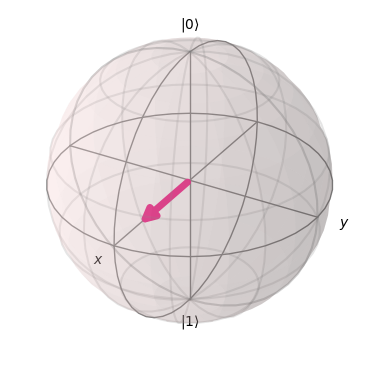

In [33]:
Re_qc8_statevector = np.real(statevector(qc8, display_latex=False))  
plot_bloch_vector(Re_qc8_statevector, figsize=(3.5, 3.5))

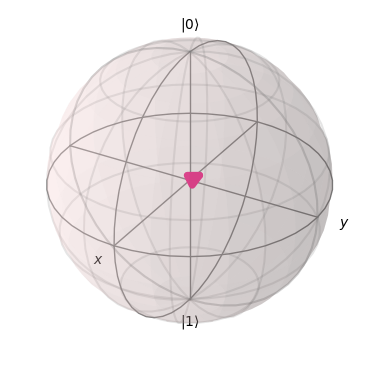

In [34]:
Re_qc5_statevector = np.real(statevector(qc5, display_latex=False))  
plot_bloch_vector(Re_qc5_statevector, figsize=(3.5, 3.5))

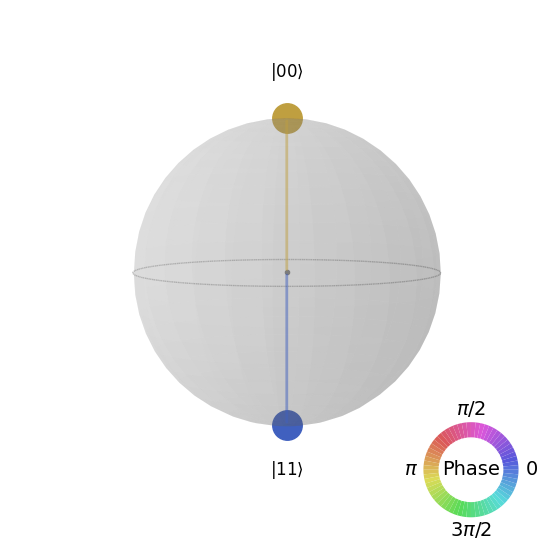

In [35]:
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(Re_qc8_statevector)

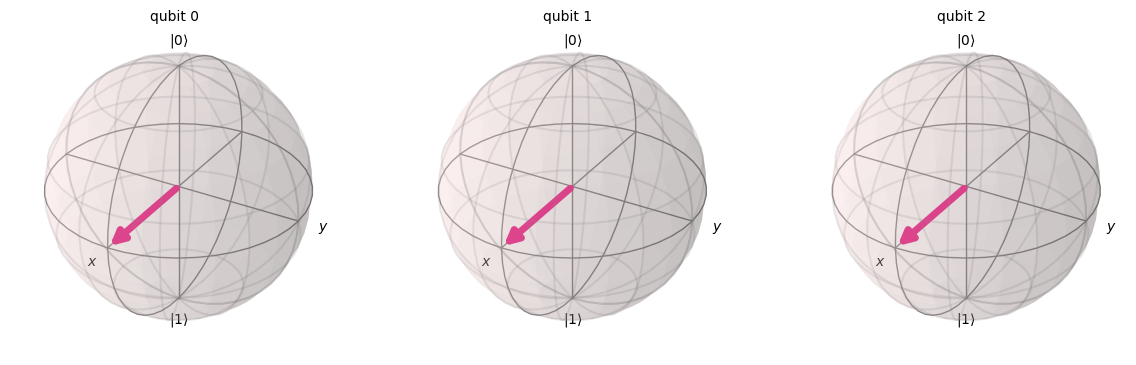

In [36]:
from qiskit.visualization import plot_bloch_multivector
 
plot_bloch_multivector(statevector(qc5, display_latex=False))

The size of the ball is proportional to the probability of measuring that state and the color represents the phase

The image displays a Q-sphere, a visual representation of the state of a two-qubit system in quantum computing, reflecting the outcomes from a specific quantum circuit. The Q-sphere shows two prominent points, one at the top and one at the bottom, which correspond to the quantum states |00⟩ and |11⟩ respectively. Their equal size suggests that the system has an equal chance of being measured in either of these two states. The absence of other points means that the states |01⟩ and |10⟩ have no probability of being measured. The positioning of the points directly opposite each other, combined with the color coding, indicates these states are out of phase by π radians, a hallmark of quantum entanglement. This pattern is typical of the Bell state $|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$, an entangled state where the measurement of one qubit will immediately determine the state of the other, showing the qubits are perfectly correlated.

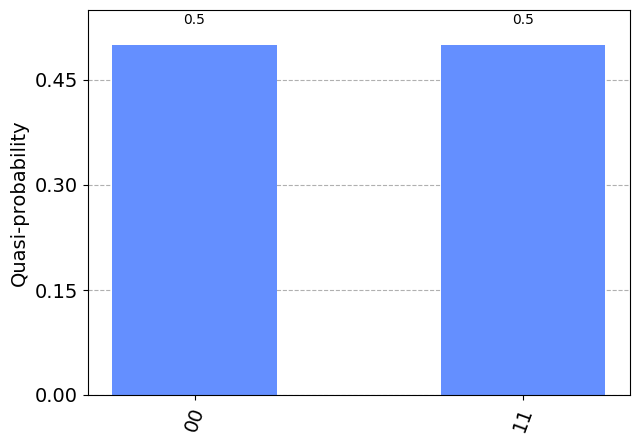

In [37]:
def quasiprobability(qc):
    '''
    Calculate probability from the circuit
    '''
    backend = Aer.get_backend('statevector_simulator')
    result = execute(qc, backend).result()
    return result.get_counts()

plot_histogram(quasiprobability(qc8))

## Sampling the circuit (simulator & real hardware)

Now we want to run the circuit as how it is done in a real experiment, by sampling it.
We have two ways to do it, either by using a sampling simulator or by running the code on a real QPU.

First, let's try to obtain the output of a quantum circuit using the sampling simulator called the `QASM simulator`.

In [38]:
def simulator(qc, sampling):
    '''
    Simulates the given quantum circuit and returns the measurement counts.
    '''
    backend_qasm = Aer.get_backend('qasm_simulator')
    # Run the circuit and get the result
    result = execute(qc, backend_qasm, shots=sampling).result()
    return result.get_counts()

Since we are now doing a real measurement (sampling), we need to put the measurement on the circuit.

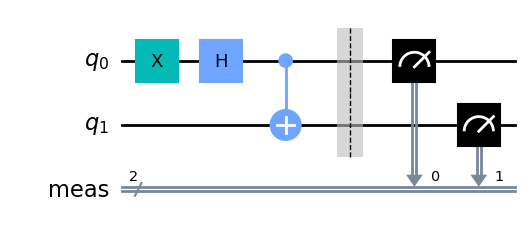

In [39]:
# create quantum cirquit
qc9 = QuantumCircuit(2)
qc9.x(0)
qc9.h(0)
qc9.cx(0,1)
qc9.measure_all()

qc9.draw('mpl', style="clifford")

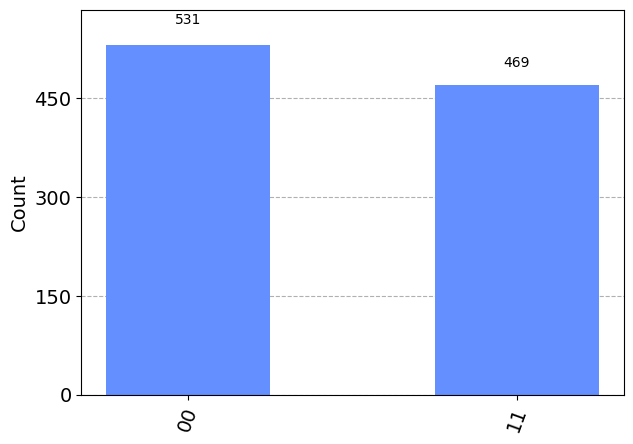

In [40]:
plot_histogram(simulator(qc9, 1000))

Several observations to make:

1. It's not always exactly 50-50 between the states. Since this simulator samples the circuit, it's expected that we won't get the theoretical probability. It's similar to flipping a coin with two sides - we know that in theory, there's a 50-50 chance of getting heads or tails. But when we experiment with a limited number of samples, we often get more of one or the other instead.
2. The combined count of 486 and 514 measurements equals the total, which is determined by the "shots" parameter.  Theoretically, infinite measurements would result in a 50-50 probability. Conversely, the probability of deviation from theory increases with fewer measurements.

## Some more features

### Arbitrary state 

We assume have initial state as follows

$$
| \Psi (a) \rangle = a |0\rangle + \sqrt{(1-a^{2})} |1\rangle
$$
where $a$ is the real number

In [41]:
a = 0.24112022
init_state = [a, np.sqrt(1-a**2)]

init_state

[0.24112022, 0.9704952547576684]

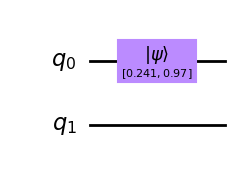

In [42]:
qc10 = QuantumCircuit(2)
qc10.initialize(init_state, 0)

qc10.draw('mpl', style="clifford")

Obtain unitary tranformation to prepare the initial state

In [43]:
def unitary_transformation(qc, display_latex=True):
    '''
    Determine the operator of the circuit by simulating it and creating a diagonal operator
    '''
    # Simulate the circuit
    backend = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    result = job.result()

    # Get state vector
    state_vector = result.get_statevector(qc, decimals=6)

    # Create a diagonal operator from the state vector
    ops = Operator(np.diag(state_vector))
    if display_latex:
        return array_to_latex(ops.data, prefix="\\text{Circuit} = ")
    else:
        return ops

In [44]:
unitary_transformation(qc10)

<IPython.core.display.Latex object>

In [45]:
from qiskit.quantum_info import Statevector

sv_0 = Statevector.from_label('00')

sv_0.draw('latex')

<IPython.core.display.Latex object>

In [46]:
init_state_sv = sv_0.evolve(unitary_transformation(qc10, display_latex=False))

In [47]:
init_state_sv.draw('latex')

<IPython.core.display.Latex object>

### Rotation gates

A rotation gate is a parameterized quantum gate designed to rotate a qubit at a specific angle, based on the value of its parameters. Such gates are fundamental in constructing non-deterministic algorithms, such as those used in quantum machine learning. The standard rotation gates include rotations around the three primary axes: $X$, $Y$, and $Z$. This capability allows for precise manipulation of qubits, essential for quantum computing applications.

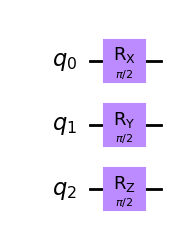

In [48]:
rot_qc = QuantumCircuit(3)

# Apply rotation around x-axis by pi/2 to the first qubit
rot_qc.rx(np.pi/2, 0)
# Apply rotation around y-axis by pi/2 to the second qubit
rot_qc.ry(np.pi/2, 1)
# Apply rotation around z-axis by pi/2 to the third qubit
rot_qc.rz(np.pi/2, 2)

rot_qc.draw('mpl', style="clifford")

Or a general unitary gate can be defined as:

$$
U(\theta, \phi, \lambda)=\left(\begin{array}{cc}
\cos \left(\frac{\theta}{2}\right) & -e^{i \lambda} \sin \left(\frac{\theta}{2}\right) \\
e^{i \phi} \sin \left(\frac{\theta}{2}\right) & e^{i(\phi+\lambda)} \cos \left(\frac{\theta}{2}\right)
\end{array}\right).
$$

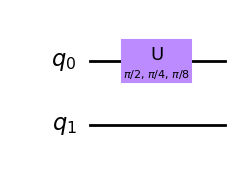

In [49]:
unitary_gate = QuantumCircuit(2)

unitary_gate.u(np.pi/2, np.pi/4, np.pi/8, 0)

unitary_gate.draw('mpl', style="clifford")

We can invoke a Toffoli gate for a CNOT operation controlled by two qubits.

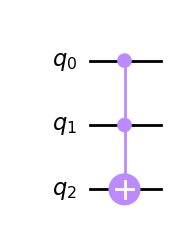

In [50]:
tof_gate = QuantumCircuit(3)

tof_gate.ccx(0, 1, 2, 3)

tof_gate.draw('mpl', style="clifford")

Or, alternatively, we could develop multi-controlled versions of single-qubit gates. Here is an example of a controlled-Hadamard gate which is controlled by three qubits.

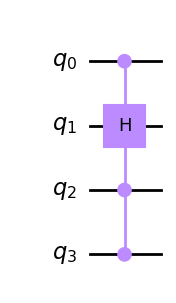

In [51]:
from qiskit.circuit.library import HGate

ch = HGate().control(3)

qc = QuantumCircuit(4)
qc.append(ch, [0,2,3, 1])
qc.draw('mpl', style="clifford")